# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [2]:
path = r"/content/b1abb33c4f.csv"
df = pd.read_csv(path)
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
df.loc[df['APGAR5'] <= 3, 'classificacao'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5),
           'classificacao'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7),
           'classificacao'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8), 'classificacao'] = 'normal'

df['classificacao'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: classificacao, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

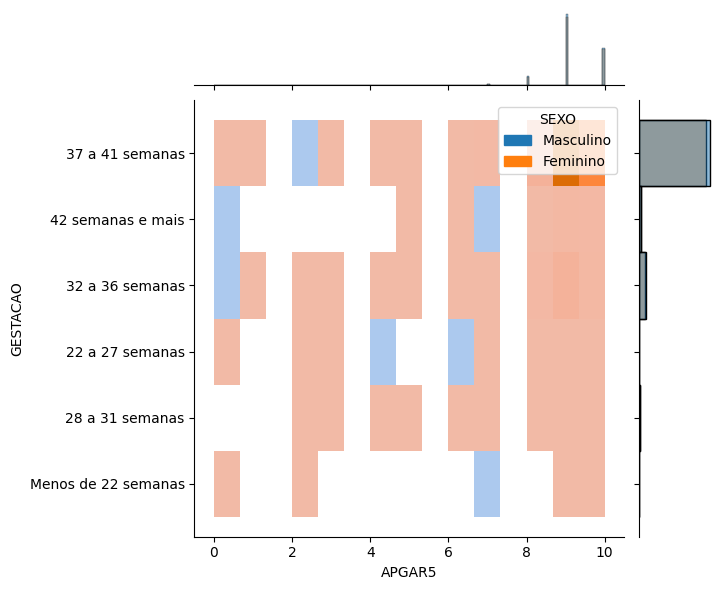

In [18]:
sns.jointplot(x = 'APGAR5'
              , y = 'GESTACAO'
              , data = df
              , kind="hist"
              , hue = 'SEXO'
              , bins = [15, 15])

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [33]:
tabela = pd.crosstab(df['GESTACAO'], df['APGAR5'])
tabela

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [22]:
tabela.apply(lambda row: row/row.sum() * 100, axis=1)

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.235294,0.000000,9.411765,7.058824,1.176471,0.000000,2.352941,11.764706,28.235294,22.352941,9.411765
28 a 31 semanas,0.000000,0.000000,1.234568,0.617284,3.086420,4.320988,4.320988,6.790123,37.654321,33.950617,8.024691
32 a 36 semanas,0.089526,0.089526,0.089526,0.089526,0.358102,0.492390,0.760967,2.506714,16.204118,58.504924,20.814682
37 a 41 semanas,0.022200,0.088798,0.013320,0.022200,0.031079,0.093238,0.199796,0.670426,6.291347,60.227323,32.340274
42 semanas e mais,0.143266,0.000000,0.000000,0.000000,0.000000,0.143266,0.143266,0.716332,6.303725,60.601719,31.948424
Menos de 22 semanas,14.285714,0.000000,14.285714,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000,42.857143,14.285714


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

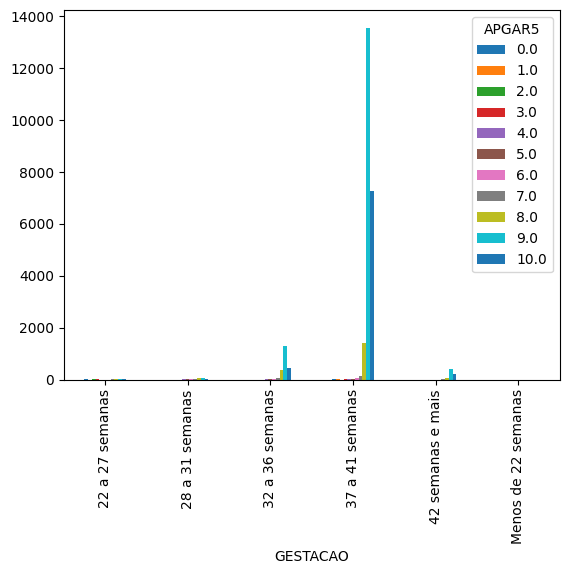

In [45]:
tabela.plot.bar()


**O conjunto de dados corrobora com a afirmação dos médicos.**

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='PESO', ylabel='APGAR5'>

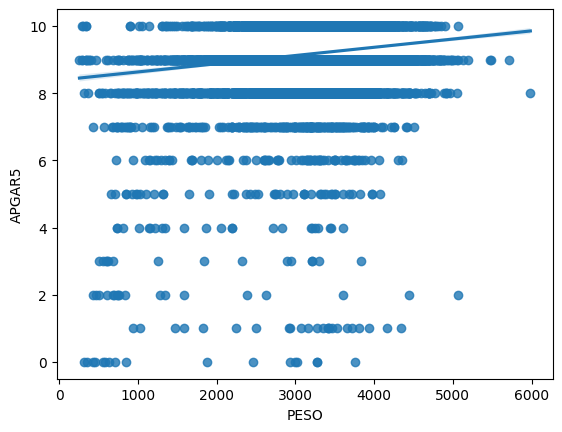

In [44]:
sns.regplot(x='PESO', y='APGAR5', data= df)